In [1]:
"""
   This is the simplified codes for both the PCA and Discrete-S energy function, analyzing Grids, Cantor Sets, etc. Supervised by Prof.Iosevich and Prof.Wyman

   """
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import itertools
from itertools import product

One way to rotate a 2 dimensional set

In [2]:
def Rotate2Dpoint(degree, onepoint):
    theta = np.radians(degree)
    MatrixR = np.array(
        ((np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta)))
    )

    return MatrixR.dot(onepoint)


def Rotate2Dlist(degree, listoflist):
    empty_array = np.empty(
        (0, 2), float
    )  # 2 columns 0 rows, so the numpy array here is strictly speficied as (x1,y1),(x2,y2),(x3,y3).....
    for point in listoflist:
        v = Rotate2Dpoint(degree, point)

        empty_array = np.append(empty_array, np.array([v]), axis=0)

    return empty_array

PCA analysis for the cartesian product of two Cantor Sets

---



Enter n, number of iterations:
5
explained_variance_ratio:  [0.5 0.5]
explained_variance:  [0.15003673 0.15003673]
after roation [0.5 0.5]
after roation [0.15003673 0.15003673]


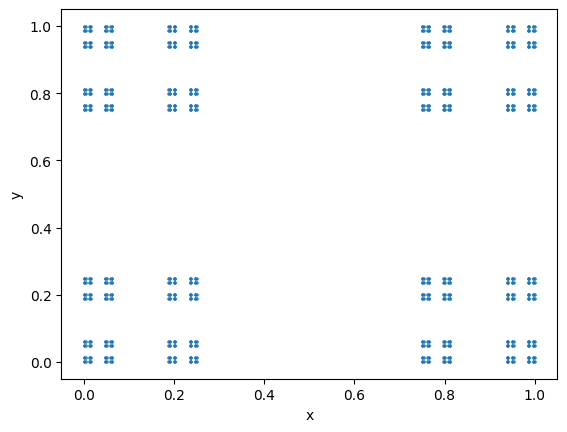

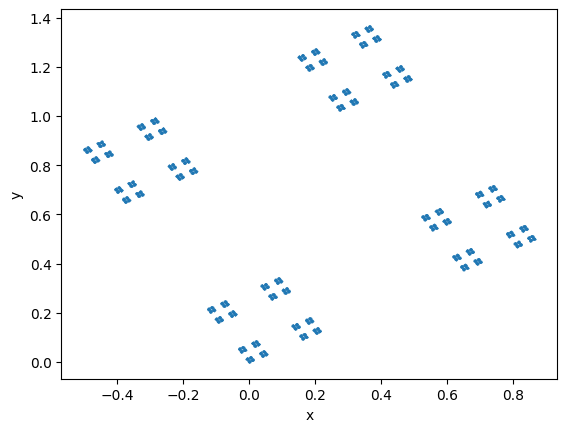

In [3]:
print("Enter n, number of iterations:")
n = int(input())

# y = np.array([[-1, -1],[1,3]])  example of 2D array

# create an empty array first, representing the x-coordinates of the points in R^2

xaxis = []  # if the elment you want to add is already in the list, don't add it


def CheckDuplicate(listSE, input):
    for element in listSE:
        if input == element:
            return False
    return True


# the main algorithm to find those points('s coordinate) in Cantor set, start it from the one-dimensionanl case
# and do the cartesian product to get the 2 dimension Cantor set


def recursiveCantor(listSE, Start, End, n):
    len = End - Start
    FirstQ = [Start, Start + len / 4]
    ForthQ = [End - len / 4, End]
    # print(ForthQ)
    if n >= 1:
        recursiveCantor(FirstQ, Start, Start + len / 4, n - 1)
        recursiveCantor(ForthQ, End - len / 4, End, n - 1)
    if CheckDuplicate(xaxis, Start) == True:
        xaxis.append(Start)
    if CheckDuplicate(xaxis, End) == True:
        xaxis.append(End)


recursiveCantor(
    [0, 1], 0, 1, n
)  # this forms the value of each points on x-axis in unit square

yaxis = xaxis  # exactly same corresponding values for y-axis

cartesian = list(product(xaxis, yaxis))

x = np.array(cartesian)

newx = Rotate2Dlist(30, x)

pca = PCA(
    n_components=2
)  # we have two components here(i.e two dimensions) x-axis and y-axis

newCartesian = pca.fit_transform(x)

invCartesian = pca.inverse_transform(
    newCartesian
)  # inverse of the transformed data set

print(
    "explained_variance_ratio: ", pca.explained_variance_ratio_
)  # important! this will tell the percentage of each component takes in the total variance

print(
    "explained_variance: ", pca.explained_variance_
)  # Equal to n_components largest eigenvalues of the covariance matrix of X.

pca2 = PCA(n_components=2)

newCartesian2 = pca2.fit_transform(newx)

print("after roation", pca2.explained_variance_ratio_)

print("after roation", pca2.explained_variance_)

dataset = pd.DataFrame({"col1": x[:, 0], "col2": x[:, 1]})
fig = plt.figure()
plt.get_current_fig_manager().set_window_title("Cantor set")
ax = fig.add_subplot(1, 1, 1)
xcomponent = x[:, 0]
ycomponent = x[:, 1]
ax.scatter(xcomponent, ycomponent, s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

dataset = pd.DataFrame({"col1": newx[:, 0], "col2": newx[:, 1]})
fig = plt.figure()
plt.get_current_fig_manager().set_window_title(
    "Cantor set rotates \u03F4 degree"
)  # here theta is 30 degree
ax = fig.add_subplot(1, 1, 1)
xcomponent = newx[:, 0]
ycomponent = newx[:, 1]
ax.scatter(xcomponent, ycomponent, s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

PCA analysis for 2D Grid

divide a segment into n equal parts, enter your n:
5
[0.5 0.5] explained_variance_ratio
[0.12 0.12] explained_variance
After roation [0.5 0.5] explained_variance_ratio
After roation [0.12 0.12] explained_variance


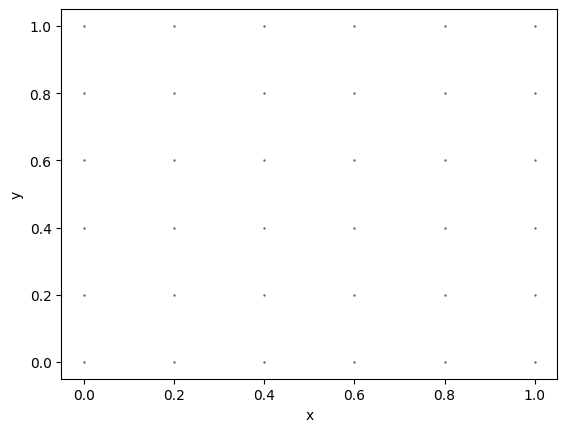

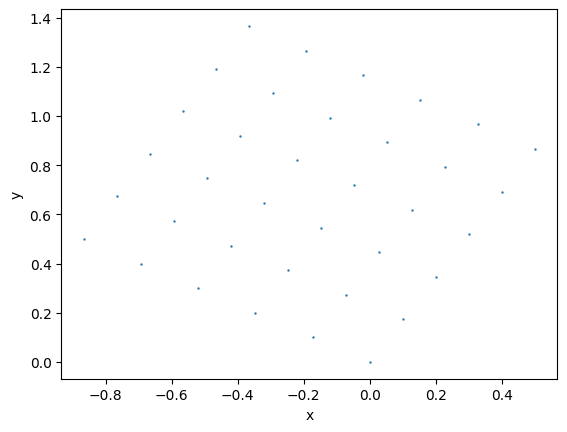

In [4]:
print("divide a segment into n equal parts, enter your n:")
n = int(input())

# initialize values on x-axis
xaxis = []

# the function which creates a list of a line being divided into n equal segments, origlist is the one need to be divided, return nlist


def generateEqualSpace(origlist, list, nseg):
    start = origlist[0]
    end = origlist[1]
    seglength = end - start
    list.append(start)
    i = 0
    for i in range(n):
        start += seglength / nseg

        list.append(start)


generateEqualSpace(
    [0, 1], xaxis, n
)  # since a unit square is needed, do the divition on [0,1]

yaxis = xaxis

cartesian = list(product(xaxis, yaxis))

x = np.array(cartesian)  # put it into 2-D array thus apply PCA

pca = PCA(
    n_components=2
)  # we have two components here(i.e two dimensions) x-axis and y-axis, so first don't reduce the dim but do some analysis

newCartesian = pca.fit_transform(x)  # refers to PCA from sklearn

invCartesian = pca.inverse_transform(
    newCartesian
)  # inverse of the transformed data set

print(pca.explained_variance_ratio_, "explained_variance_ratio")

print(pca.explained_variance_, "explained_variance")

newx = Rotate2Dlist(60, x)  # rotate 60 degrees in a counterclockwise direction

pca2 = PCA(n_components=2)

newCartesian2 = pca2.fit_transform(newx)

print("After roation", pca2.explained_variance_ratio_, "explained_variance_ratio")

print("After roation", pca2.explained_variance_, "explained_variance")

dataset = pd.DataFrame({"col1": x[:, 0], "col2": x[:, 1]})
# print(dataset)
fig = plt.figure()
plt.get_current_fig_manager().set_window_title("Lattice")
ax = fig.add_subplot(1, 1, 1)
xcomponent = x[:, 0]
ycomponent = x[:, 1]
ax.scatter(xcomponent, ycomponent, s=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

dataset = pd.DataFrame({"col1": newx[:, 0], "col2": newx[:, 1]})
fig = plt.figure()
plt.get_current_fig_manager().set_window_title(
    "Lattice set rotates \u03F4 degree"
)  # here theta is 60 degree
ax = fig.add_subplot(1, 1, 1)
xcomponent = newx[:, 0]
ycomponent = newx[:, 1]
ax.scatter(xcomponent, ycomponent, s=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now we turn our attention to the Discrete-S energy function

In [5]:
def DiscreteEnergy(P, s, N):
    """
    P - list of one-dimensional arrays
    s - positive real number
    N - number of points in P

    """
    c = 0
    for i in range(N - 1):
        # P = np.array(P)
        # P[i+1:] is the list of points after P[i]
        # Then, from each point in this list, we subtract P[i]
        diff = P[i + 1 :] - P[i]

        # Then we compute the norm of each one of those points.
        # Each point is a row of our array P, so we pass
        # the argument axis = 1 to indicate that.
        norms = np.linalg.norm(diff, axis=1)

        # print(norms)
        # Then we take -s'th power of those numbers and sum them
        c += np.sum(np.power(norms, -s))
    return c / N**2


def BigCantor(n):
    return DiscreteEnergy(
        x, svalue, (n + 1) ** 2
    )  # Where svalue is the critical value s

We first test it on a 2-D grid (a Lattice)

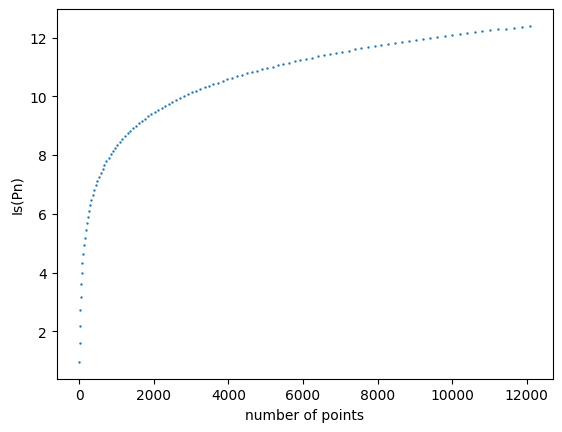

In [6]:
xaxis = []


def generateEqualSpace(origlist, list, nseg):
    start = origlist[0]
    end = origlist[1]
    seglength = end - start
    list.append(start)
    i = 0
    for i in range(nseg):
        start += seglength / nseg
        list.append(start)
    """

    Need to enter the s value manually to test convergence, if the entry is the critical value, then the discrete-s energy shall converge as the number of points increase
    if the entry is bigger than the critical value, then the discrete-s will not converge
    """


svalue = 2


def BigCantor(n, x):
    return DiscreteEnergy(x, svalue, (n + 1) ** 2)  # svalue should be 2


xcomponent = []

ycomponent = []

for i in range(1, 110):  # actually range from 0 to 20 but we dont need 0
    xaxis = []
    generateEqualSpace([0, 1], xaxis, i + 1)

    yaxis = xaxis
    cartesian = list(product(xaxis, yaxis))

    x = np.array(cartesian)
    xcomponent.append((i + 1) ** 2)
    ycomponent.append(BigCantor(i + 1, x))

output = "Lattice s-value = " + str(svalue)

fig = plt.figure()
plt.get_current_fig_manager().set_window_title(output)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xcomponent, ycomponent, s=0.5)
plt.xlabel("number of points")
plt.ylabel("Is(Pn)")
plt.show()

Then we test the Discrete-S on the $C^k_\text{2,4}$ Cantor sets

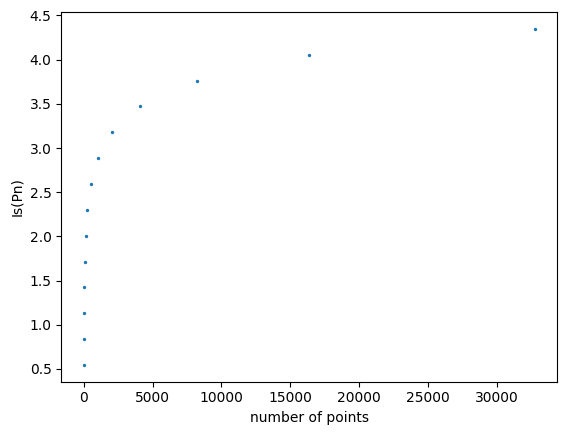

In [7]:
xaxis = []


def DiscreteEnergyOneDim(P, s, N):
    P = np.array(P)  # making sure we are using numpy array
    c = 0
    for i in range(N - 1):
        diff = P[i + 1 :] - P[i]
        c += np.sum(np.abs(diff) ** (-s))
    return c / N**2


svalue = np.log(2) / np.log(
    4
)  # should be np.log(2) / np.log(4)=0.5, and please try any other values to see the differences

xcomponent = []
ycomponent = []


def BigCantor(n):
    return DiscreteEnergyOneDim(xaxis, svalue, 2 ** (n + 1))  # np.log(2) / np.log(3)


for i in range(1, 15):
    xaxis = []
    recursiveCantor([0, 1], 0, 1, i)
    x = np.array(xaxis)
    xcomponent.append(2 ** (i + 1))
    ycomponent.append(BigCantor(i))


output = "C2,4 Cantor Set s-value = " + str(svalue)
# print(dataset)
fig = plt.figure()
plt.get_current_fig_manager().set_window_title(output)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(xcomponent, ycomponent, s=2)
plt.xlabel("number of points")
plt.ylabel("Is(Pn)")
plt.show()